# Exercicios

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy as sp
from scipy.integrate import odeint

#### Exercicio 1 - Resolver pelo método de Euler, com passo h=0.2 e x$\epsilon$[0 ,1] a equação diferencial y’=x/y, com y(0)=1. Resolver também usando o dsolve.

[1.         1.         1.04       1.11692308 1.22436109 1.3550415 ]


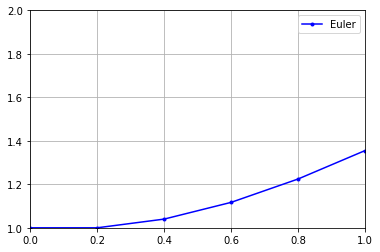

In [12]:
# Metodo de Euler
def odeEuler(f,y0,t):
  y = np.zeros(len(t))
  y[0] = y0
  for n in range(0,len(t)-1):
    y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
  return y

t = np.linspace(0,1,6)
y0 = 1
f = lambda y,t: t/y
y = odeEuler(f,y0,t)
print(y)

# grafico
plt.plot(t,y,'b.-')
plt.legend(['Euler'])
plt.axis([0,1,1,2])
plt.grid(True)
plt.show()

In [28]:
# dsolve
x = sym.symbols('x')
y= sym.symbols('y', cls=sym.Function)
sol=sym.Eq(y(x).diff(x)-x/y(x), 0)
sol


Eq(-x/y(x) + Derivative(y(x), x), 0)

In [38]:
soln = sym.dsolve(sol, y(x))
print(f"{soln}")
print(f"{soln[0]}")
print(f"{soln[1]}")

[Eq(y(x), -sqrt(C1 + x**2)), Eq(y(x), sqrt(C1 + x**2))]
Eq(y(x), -sqrt(C1 + x**2))
Eq(y(x), sqrt(C1 + x**2))


In [42]:
constants = sym.solve([soln[0].rhs.subs(x,0) - 1]) #condição inicial y(0)=1
display(constants)
resposta=soln[0].subs(constants)
display(resposta)

[]

Eq(y(x), -sqrt(C1 + x**2))

In [43]:
constants = sym.solve([soln[1].rhs.subs(x,0) - 1]) #condição inicial y(0)=1
display(constants)
resposta=soln[1].subs(constants)
display(resposta)

[{C1: 1}]

KeyError: 0

#### Exercicio 2 - Resolver pelo método de Euler, com passo h=0.2 e x$\epsilon$[0, 1] a equação diferencial y’=y*cosx(x), com y(0)=1. Resolver também usando o odint.

[1.         1.2        1.43521598 1.69960027 1.9801484  2.25606493]


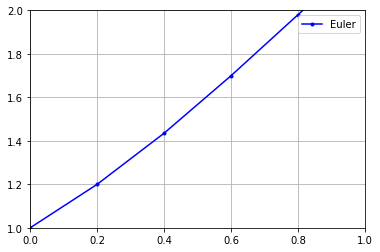

In [11]:
# Metodo de Euler
def odeEuler(f,y0,t):
  y = np.zeros(len(t))
  y[0] = y0
  for n in range(0,len(t)-1):
    y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
  return y

t = np.linspace(0,1,6)
y0 = 1
f = lambda y,t: y * np.cos(t)
y = odeEuler(f,y0,t)
print(y)

# grafico
plt.plot(t,y,'b.-')
plt.legend(['Euler'])
plt.axis([0,1,1,2])
plt.grid(True)
plt.show()

[[1.        ]
 [1.21977837]
 [1.47612173]
 [1.75881865]
 [2.04900842]
 [2.31977655]]


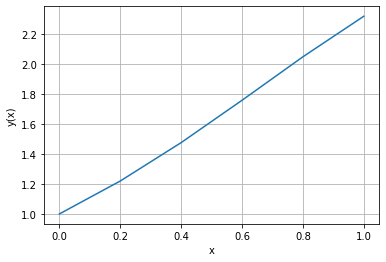

In [14]:
# odint
# function that returns dy/dt
def model(y,t): 
    dydt = y * np.cos(t)
    return dydt
# initial condition
y0 = 1
# time points
t = np.linspace(0,1,6)
# solve ODE
y = odeint(model,y0,t)
print(y)
# plot results
plt.plot(t,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()

#### Exercicio 3 - Aplique a formulação de Euler e estime o valor de y(2,2) da EDO  y’ = 3 – y/x, com condição inicial y(2) = 2 e passo h = 0,1.

[2.         2.025      2.04878049 2.07142857 2.09302326]


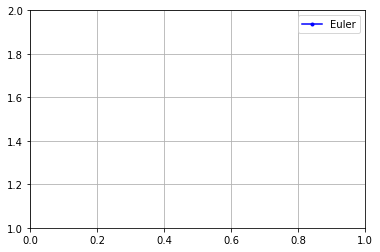

In [51]:
def odeEuler(f,y0,t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

t = np.linspace(2,2.2,5)
y2 = 2
f = lambda y,t: (3 - y) / t
y = odeEuler(f,y2,t)
print(y)
plt.plot(t,y,'b.-')
plt.legend(['Euler'])
plt.axis([0,1,1,2])
plt.grid(True)
plt.show()

#### Exercicio 4 - A temperatura T de uma caldeira depende dessa temperatura e do tempo t de aquecimento de acordo com a equação dT/dt=0.18 * T * t. Sabemos que a temperatura é T=80 C quando t=0. Calcular a temperatura quando t=2 e t=4 usando o odint.

[[ 80.        ]
 [ 87.53395018]
 [114.66636501]
 [179.83266584]
 [337.65573863]]


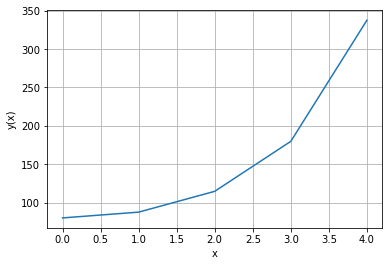

In [56]:
# function that returns dy/dt
def model(T,t): 
    dydt = 0.18 * T * t
    return dydt
# initial condition
T0 = 80
# time points
t = np.linspace(0,4,5)
# solve ODE
T = odeint(model,T0,t)
print(T)
# plot results
plt.plot(t,T)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.show()